# Sentimental Analysis for Tweets

Hello world
Today we are going to learn how to process and model natural language

The main goal of this notebook is to tell you the main steps involved in text processing

we'll create a simple logistic regression model using Tensorflow

About Dataset

CONTEXT

In these modern days every one is connected via social media. 
If a person is depressed we may be able to pick that up from their use of words on social media

Can you predict depression?

Sentimental Analysis can be very useful to find out depression and cure it before someone gets into serious trouble.

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#set display option
pd.set_option('display.max_row',1000)
pd.set_option('display.max_column',1000)
pd.set_option('display.width',5000)

In [3]:
#Read the Dataset
df=pd.read_csv(r"C:\Users\RBC\Desktop\ML_projects\Tweet Sentiment\Twitter Sentiments.csv")

In [4]:
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


### Data Cleaning and Processing

In [5]:
#Importing libraries for text analysis
import string
import nltk
import re
stopword=nltk.corpus.stopwords.words("english")
from nltk.tokenize import word_tokenize

In [6]:
#Remove pattern
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [7]:
#Remove twitter handles @user
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

In [8]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [9]:
#Removing special character,number,punctuation
df['clean_tweet']=df['clean_tweet'].str.replace("[^#a-zA-Z]"," ")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [10]:
#removing semicolon,commma
df['clean_tweet']=df['clean_tweet'].str.replace('[‘’“”…]', ' ')
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


#Removing Hastag
df['clean_tweet']=df['clean_tweet'].str.replace('#+', ' ')
df.head()

In [11]:
#Removing shorter words
df['clean_tweet']=df['clean_tweet'].apply(lambda x : " ".join([w for w in x.split() if len(w)>3 ]))
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [12]:
#Tokenizing the words
tokenized_tweet=df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

In [13]:
#stemming the word
from nltk.stem.porter import PorterStemmer
steammer=PorterStemmer()
tokenized_tweet=tokenized_tweet.apply(lambda x:[steammer.stem(word) for word in x] )
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i]=" ".join(tokenized_tweet[i])

In [14]:
tokenized_tweet.head()

0    when father dysfunct selfish drag kid into dys...
1    thank #lyft credit caus they offer wheelchair ...
2                                  bihday your majesti
3                           #model love take with time
4                             factsguid societi #motiv
Name: clean_tweet, dtype: object

In [15]:
df["clean_tweet"]=tokenized_tweet

In [16]:
df

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,that youuu
31958,31959,0,to see nina turner on the airwaves trying to...,nina turner airwav tri wrap herself mantl genu...
31959,31960,0,listening to sad songs on a monday morning otw...,listen song monday morn work
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",#sikh #templ vandalis #calgari #wso condemn


## Explotary Data Analysis

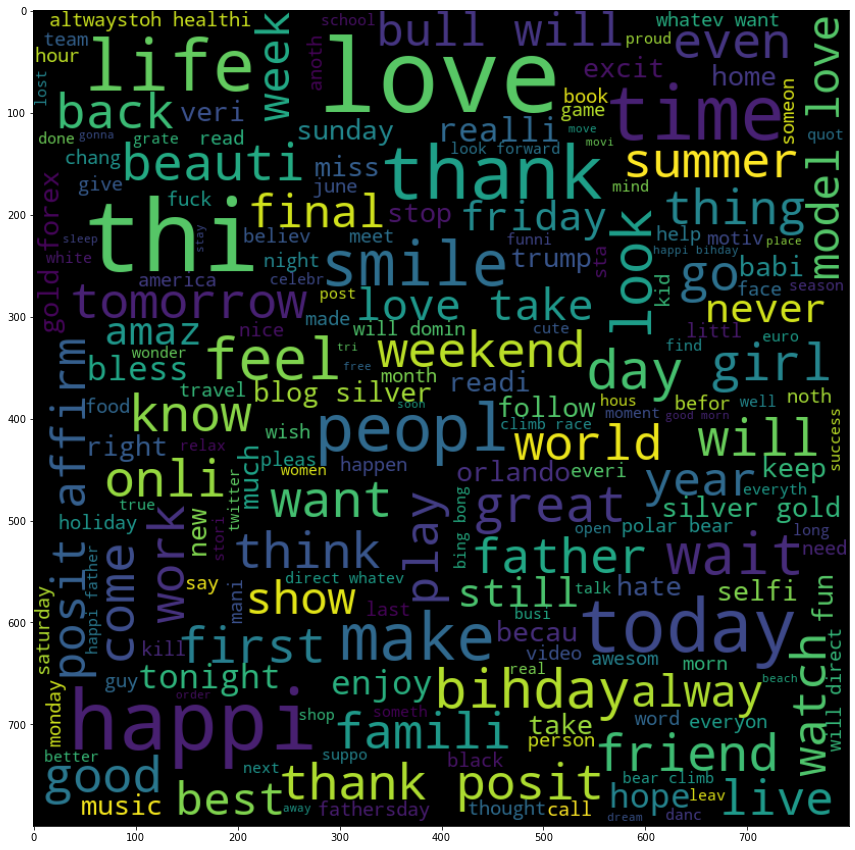

In [17]:
#Visualizing the frequent words
word=" ".join([sentence for sentence in df['clean_tweet']])
from wordcloud import WordCloud
word_cloud=WordCloud(width=800,height=800,random_state=42,max_font_size=100).generate(word)
#plotting graph
plt.figure(figsize=(15,15))
plt.imshow(word_cloud,interpolation='bilinear')
plt.show()

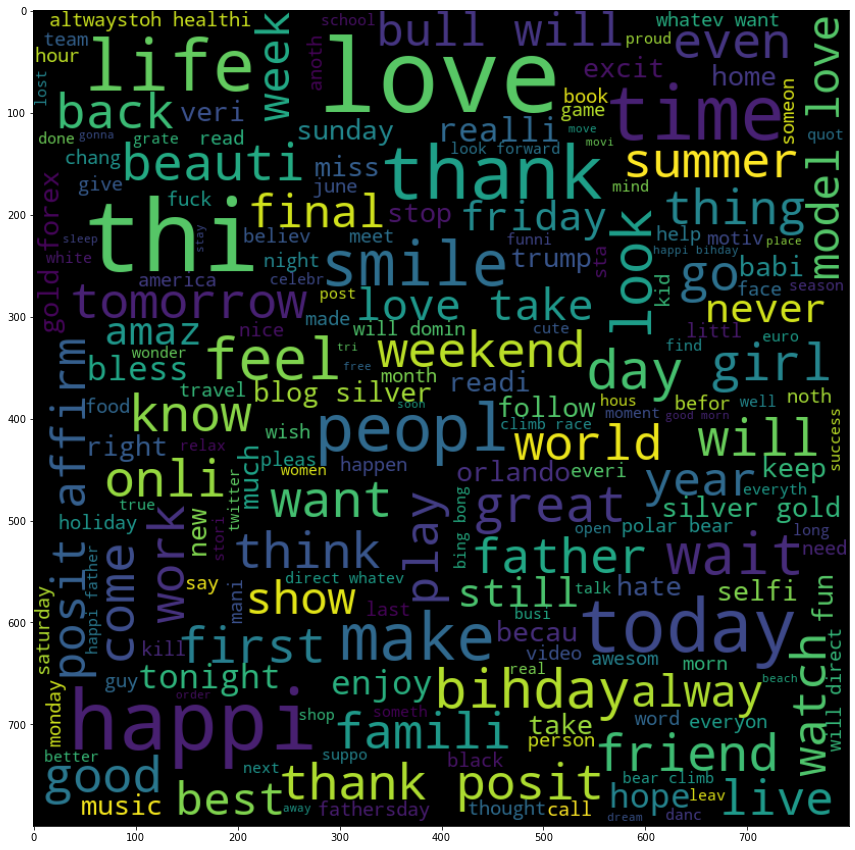

In [18]:
#frequent words for visualization for +ve
word_positive=" ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])
word_cloud=WordCloud(width=800,height=800,random_state=42,max_font_size=100).generate(word)
#plotting graph
plt.figure(figsize=(15,15))
plt.imshow(word_cloud,interpolation='bilinear')
plt.show()

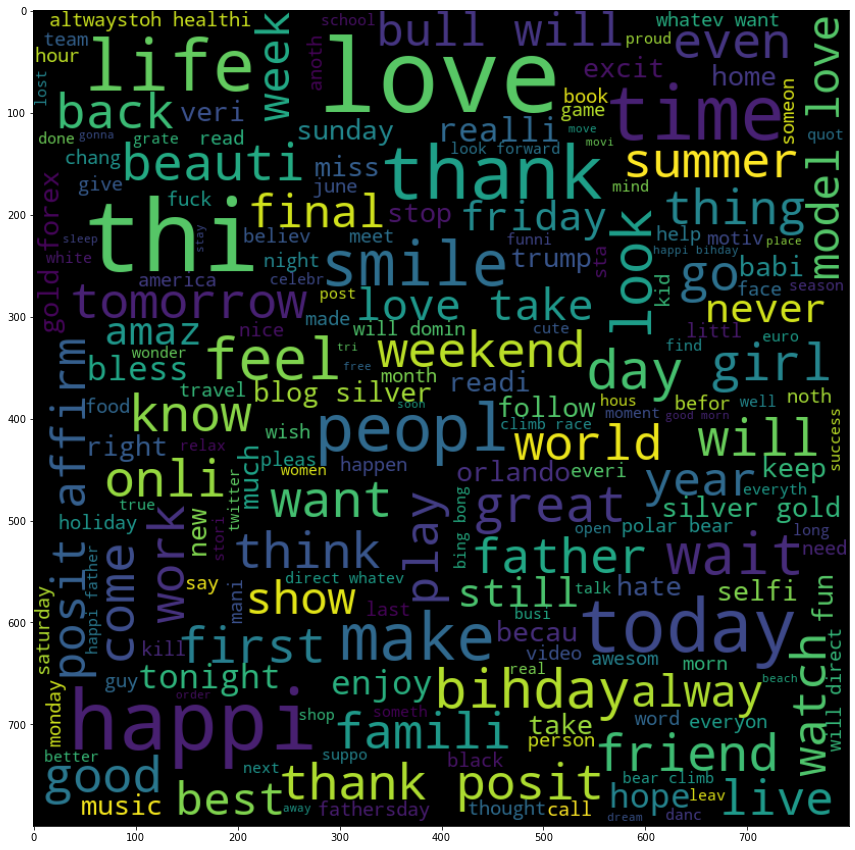

In [19]:
#Visualizing the frequent words of negative
word_negative=" ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])
from wordcloud import WordCloud
word_cloud=WordCloud(width=800,height=800,random_state=42,max_font_size=100).generate(word)
#plotting graph
plt.figure(figsize=(15,15))
plt.imshow(word_cloud,interpolation='bilinear')
plt.show()

In [20]:
# extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags 

In [21]:
# extract hashtags from non-racist/sexist tweets
word_positive = hashtag_extract(df['clean_tweet'][df['label']==0])

# extract hashtags from racist/sexist tweets
word_negative = hashtag_extract(df['clean_tweet'][df['label']==1])

In [22]:
word_positive = sum(word_positive, [])
word_negative = sum(word_negative, [])

In [23]:
word_positive[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [24]:
freq = nltk.FreqDist(word_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


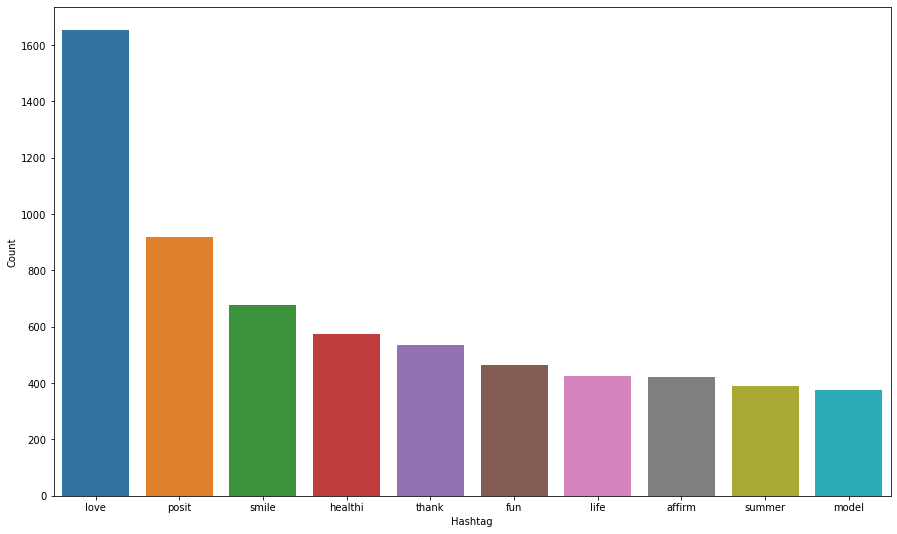

In [25]:
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [26]:
freq = nltk.FreqDist(word_negative)
d1 = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d1.head()

,Hashtag,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


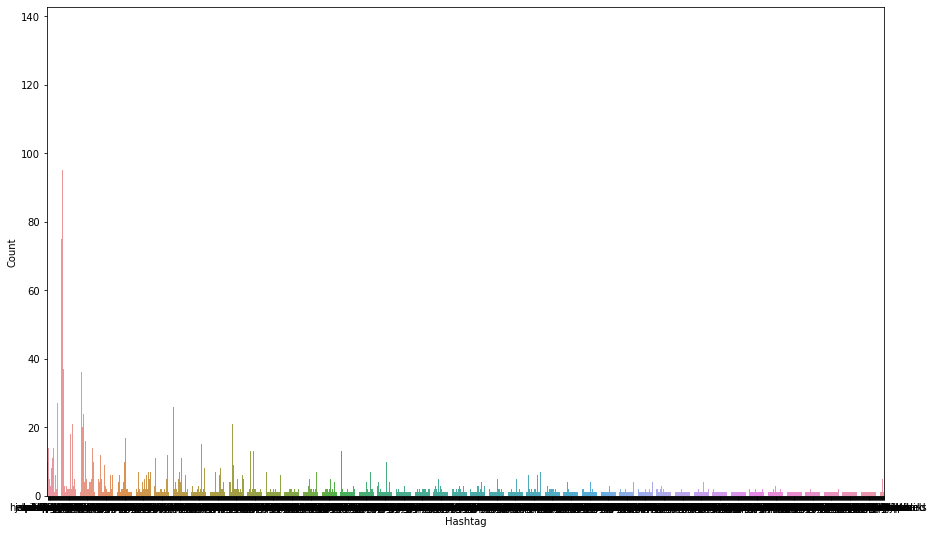

In [27]:
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d1, x='Hashtag', y='Count')
plt.show()

### Input Split

In [28]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
df_vect= vectorizer.fit_transform(df['clean_tweet'])

In [29]:
from sklearn.feature_extraction.text import TfidfTransformer
tf=TfidfTransformer()

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_vect, df['label'], random_state=52, test_size=0.20)

## Model Training

In [31]:
#Importing libraries
from sklearn.metrics import f1_score, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [32]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)
y_pred_lg=lg.predict(x_test)
print("F1_score: ",f1_score(y_test,y_pred_lg))
print("Accuracy score: ",accuracy_score(y_test,y_pred_lg))

F1_score:  0.5114155251141553
Accuracy score:  0.9497888315344909


In [33]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_predict=rf.predict(x_test)
print("F1_score: ",f1_score(y_test,y_predict))
print("Accuracy score: ",accuracy_score(y_test,y_predict))

F1_score:  0.5928659286592866
Accuracy score:  0.9482246206788675


In [34]:
gn=MultinomialNB()
gn.fit(x_train,y_train)
y_predict_gn=gn.predict(x_test)
print("F1_score: ",f1_score(y_test,y_predict_gn))
print("Accuracy score: ",accuracy_score(y_test,y_predict_gn))

F1_score:  0.5221445221445222
Accuracy score:  0.9358673549194432


# Overall result

In [35]:
print("Accuracy score of Logestic regression : ",accuracy_score(y_test,y_pred_lg))
print("Accuracy score Random forest: ",accuracy_score(y_test,y_predict))
print("Accuracy score Naive_bayes: ",accuracy_score(y_test,y_predict_gn))

Accuracy score of Logestic regression :  0.9497888315344909
Accuracy score Random forest:  0.9482246206788675
Accuracy score Naive_bayes:  0.9358673549194432
